In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/avocado.csv')
Data_Day

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
Data_Day['Date'] = pd.to_datetime(Data_Day.Date, format='%Y-%m-%d')
Data_Day

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
#casual and registered variables can be removed, as these two sums to dependent variable count
Data_Day.drop(['Unnamed: 0'], axis='columns', inplace = True)
Data_Day

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
Data_Day['Month'] = Data_Day['Date'].apply(lambda time: time.month)
Data_Day['Day of Week'] = Data_Day['Date'].apply(lambda time: time.dayofweek)
Data_Day['Year'] = Data_Day['Date'].apply(lambda t: t.year)
Data_Day['Date'] = Data_Day['Date'].apply(lambda t: t.day)
Data_Day

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day of Week,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,6,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,6,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,6,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,6,2018
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,6,2018
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,6,2018
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,6,2018


# EXPLORATORY DATA ANALYSIS

In [ ]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
Data_Day.info

<bound method DataFrame.info of        Date  AveragePrice  Total Volume  ...  Month  Day of Week  Year
0        27          1.33      64236.62  ...     12            6  2015
1        20          1.35      54876.98  ...     12            6  2015
2        13          0.93     118220.22  ...     12            6  2015
3         6          1.08      78992.15  ...     12            6  2015
4        29          1.28      51039.60  ...     11            6  2015
...     ...           ...           ...  ...    ...          ...   ...
18244     4          1.63      17074.83  ...      2            6  2018
18245    28          1.71      13888.04  ...      1            6  2018
18246    21          1.87      13766.76  ...      1            6  2018
18247    14          1.93      16205.22  ...      1            6  2018
18248     7          1.62      17489.58  ...      1            6  2018

[18249 rows x 16 columns]>

In [ ]:
Data_Day.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day of Week,Year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.0,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,6.0,2016.147899
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,0.0,0.939938
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,6.0,2015.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,6.0,2015.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,6.0,2016.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,6.0,2017.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,6.0,2018.000000


In [ ]:
#Data Types of Varaibles
print(Data_Day.dtypes)

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day of Week       int64
Year              int64
dtype: object


In [ ]:
#Dimension
Data_Day.shape

(18249, 16)

In [ ]:
# Index range
Data_Day.index

RangeIndex(start=0, stop=18249, step=1)

In [ ]:
#columns 
Data_Day.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day of Week', 'Year'],
      dtype='object')

In [ ]:
#unique values present in each variable
Data_Day.nunique()

Date               31
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day of Week         1
Year                4
dtype: int64

In [ ]:
#Defining numeric and categorical variables and saving in specific array
numeric_var = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', ]
categorical_var = ['Date', 'type', 'year', 'region', 'Month']

# DATA PRE PROCESSING

In [ ]:
#sum of missing values 
Data_Day.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day of Week     0
Year            0
dtype: int64

In [ ]:
#Outlier analysis

AveragePrice


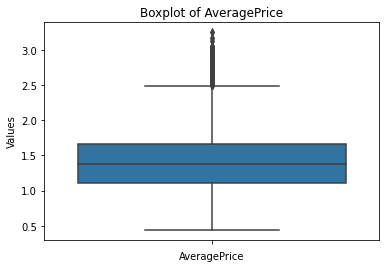

Total Volume


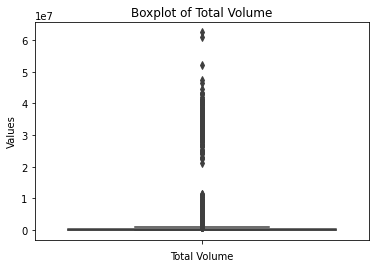

4046


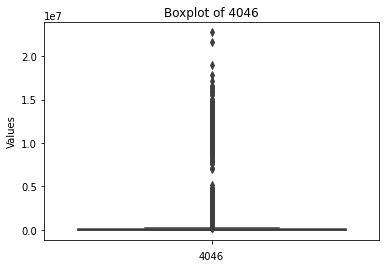

4225


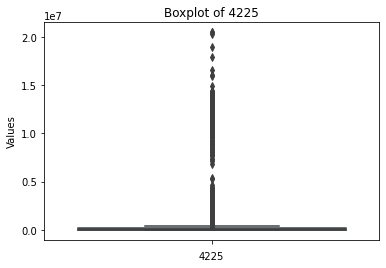

4770


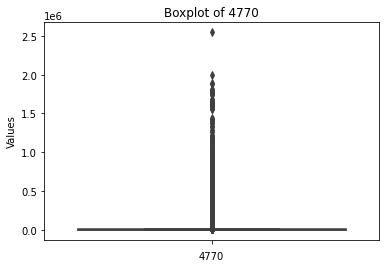

Total Bags


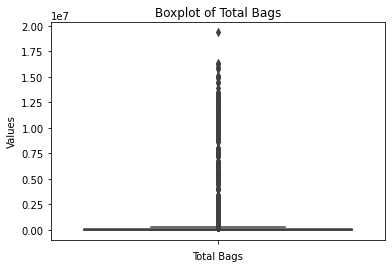

Small Bags


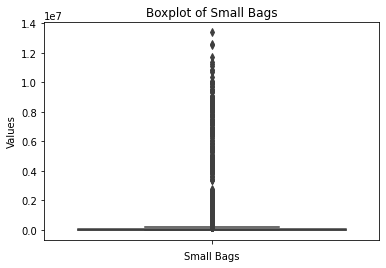

Large Bags


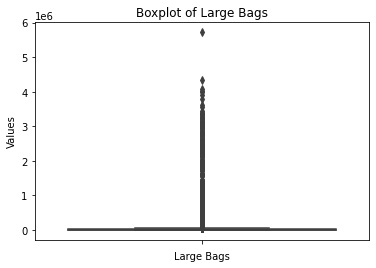

XLarge Bags


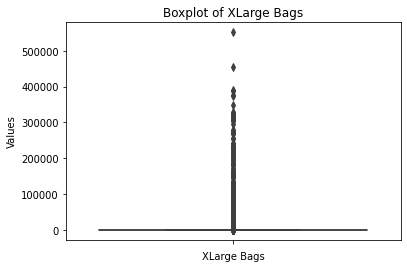

In [ ]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

***We are getting some outliers in the above graphs.***

In [ ]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

AveragePrice
Innerfence= 0.26000000000000034
Upperfence= 2.4999999999999996
IQR =0.5599999999999998
Total Volume
Innerfence= -622346.985
Upperfence= 1066147.855
IQR =422123.70999999996
4046
Innerfence= -164395.12499999997
Upperfence= 276269.39499999996
IQR =110166.12999999999
4225
Innerfence= -217788.34
Upperfence= 371003.98
IQR =147198.08
4770
Innerfence= -9365.130000000001
Upperfence= 15608.550000000001
IQR =6243.42
Total Bags
Innerfence= -153453.455
Upperfence= 269325.46499999997
IQR =105694.73
Small Bags
Innerfence= -117882.955
Upperfence= 204070.04499999998
IQR =80488.25
Large Bags
Innerfence= -32725.199999999997
Upperfence= 54881.92
IQR =21901.78
XLarge Bags
Innerfence= -198.75
Upperfence= 331.25
IQR =132.5


In [ ]:
!pip install klib

GridSpec(6, 6)

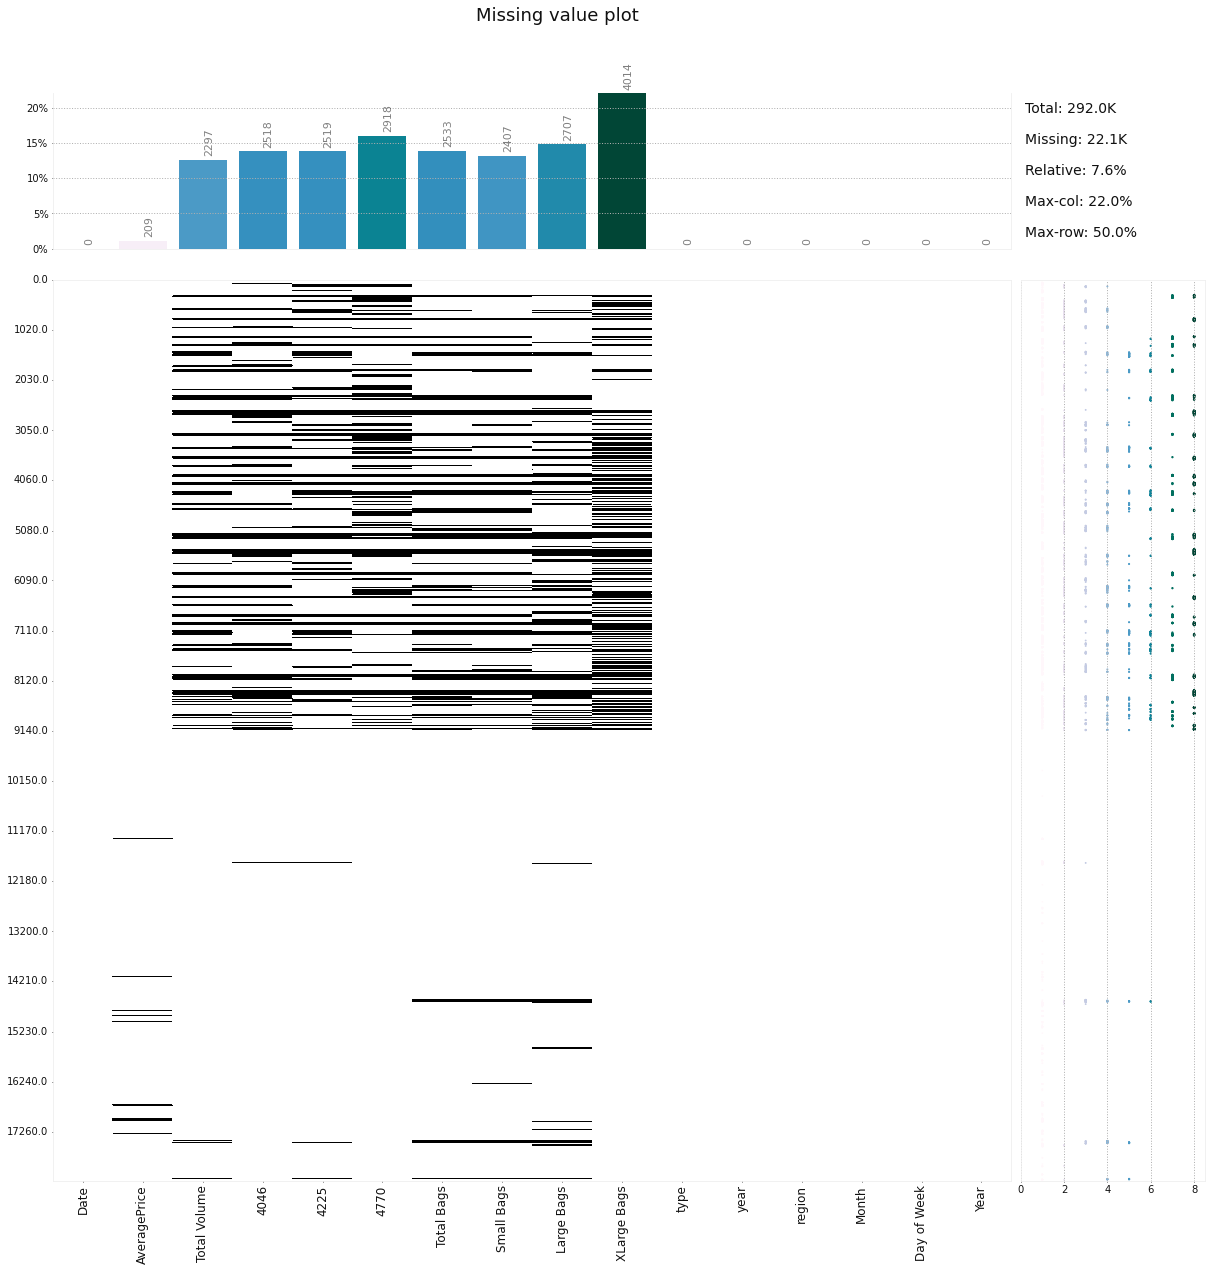

In [ ]:
import klib
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value

In [ ]:
# total 10 outliers found. Now, impute the values, by the help of median.
Data_Day['AveragePrice'] = Data_Day['AveragePrice'].fillna(Data_Day['AveragePrice'].median())
Data_Day['Total Volume'] = Data_Day['Total Volume'].fillna(Data_Day['Total Volume'].median())
Data_Day['4046'] = Data_Day['4046'].fillna(Data_Day['4046'].median())
Data_Day['4225'] = Data_Day['4225'].fillna(Data_Day['4225'].median())
Data_Day['4770'] = Data_Day['4770'].fillna(Data_Day['4770'].median())
Data_Day['Total Bags'] = Data_Day['Total Bags'].fillna(Data_Day['Total Bags'].median())
Data_Day['Small Bags'] = Data_Day['Small Bags'].fillna(Data_Day['Small Bags'].median())
Data_Day['Large Bags'] = Data_Day['Large Bags'].fillna(Data_Day['Large Bags'].median())
Data_Day['XLarge Bags'] = Data_Day['XLarge Bags'].fillna(Data_Day['XLarge Bags'].median())

In [ ]:
klib.missingval_plot(Data_Day) ## No graph will be plotted if the dataset has no missing value
Data_Day.isnull().sum()

No missing values found in the dataset.


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day of Week     0
Year            0
dtype: int64

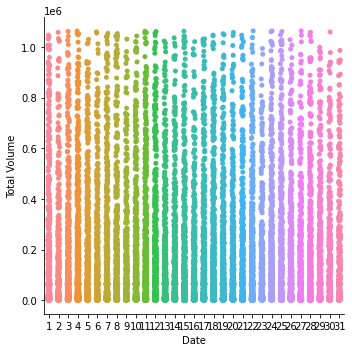

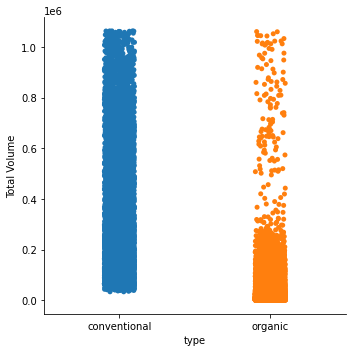

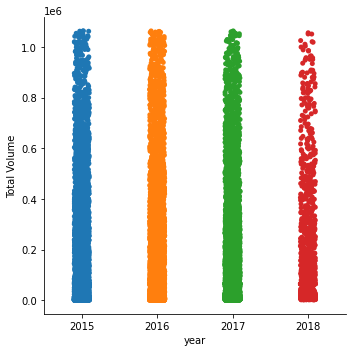

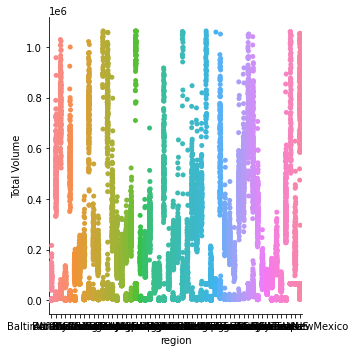

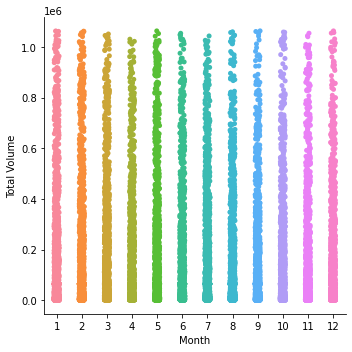

In [ ]:
for i in categorical_var:
  sns.catplot(x = i, y = "Total Volume", data=Data_Day, linewidths=.15)

              AveragePrice  Total Volume  ...  Large Bags  XLarge Bags
AveragePrice      1.000000     -0.369045  ...   -0.228788    -0.139924
Total Volume     -0.369045      1.000000  ...    0.195063     0.191642
4046             -0.272141      0.534300  ...    0.216031     0.142211
4225             -0.313043      0.547061  ...    0.114968     0.176221
4770             -0.286335      0.328823  ...    0.101955     0.131584
Total Bags       -0.360309      0.656348  ...    0.304082     0.172683
Small Bags       -0.332960      0.670283  ...    0.184537     0.145064
Large Bags       -0.228788      0.195063  ...    1.000000     0.046319
XLarge Bags      -0.139924      0.191642  ...    0.046319     1.000000

[9 rows x 9 columns]


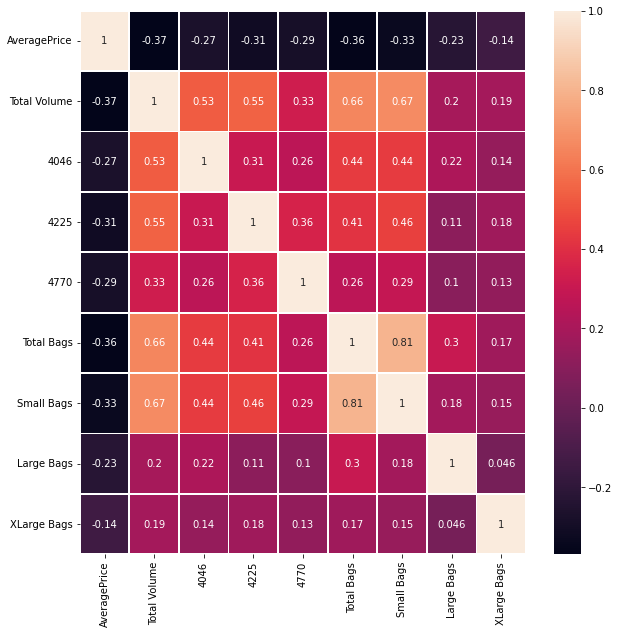

In [ ]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
Data_Day_cor = Data_Day.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(10,10)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=.8)

So in this way upon having the look at correlation graph we can eaisly infer that Average price has no substancial relationship bond with anyother variable in the dataframe.Also, totralk bags & small bags are sharing strong relationship bond. Therefore these two variable can be removed from the dataset.

In [ ]:
Data_Day.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day of Week,Year
count,18249.000000,18249.000000,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.0,18249.000000
mean,15.662612,1.390612,1.629839e+05,31990.260387,49709.413334,1435.622018,43739.909940,32649.592748,6397.796573,10.071268,2016.147899,6.177215,6.0,2016.147899
std,8.776281,0.377422,2.268243e+05,55952.949101,77674.217835,3210.148051,53105.928062,40449.537282,11259.287634,41.395352,0.939938,3.534130,0.0,0.939938
min,1.000000,0.440000,8.456000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,6.0,2015.000000
25%,8.000000,1.100000,1.083858e+04,854.070000,3008.780000,0.000000,5088.640000,2849.420000,127.470000,0.000000,2015.000000,3.000000,6.0,2015.000000
50%,16.000000,1.360000,6.509819e+04,4237.930000,15989.290000,62.450000,22904.505000,15847.175000,1446.020000,0.000000,2016.000000,6.000000,6.0,2016.000000
75%,23.000000,1.650000,2.187550e+05,36211.710000,56765.080000,670.420000,64755.790000,50677.920000,6220.200000,0.000000,2017.000000,9.000000,6.0,2017.000000
max,31.000000,2.490000,1.063584e+06,276253.480000,370026.960000,15602.760000,269169.000000,204056.330000,54855.780000,330.710000,2018.000000,12.000000,6.0,2018.000000


In [ ]:
Data_Day.drop(['AveragePrice', 'Small Bags'], axis='columns', inplace = True)
Data_Day

,Date,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region,Month,Day of Week,Year
0,27,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,conventional,2015,Albany,12,6,2015
1,20,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,conventional,2015,Albany,12,6,2015
2,13,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,conventional,2015,Albany,12,6,2015
3,6,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,conventional,2015,Albany,12,6,2015
4,29,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,conventional,2015,Albany,11,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,organic,2018,WestTexNewMexico,2,6,2018
18245,28,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,organic,2018,WestTexNewMexico,1,6,2018
18246,21,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,organic,2018,WestTexNewMexico,1,6,2018
18247,14,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,organic,2018,WestTexNewMexico,1,6,2018


In [ ]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
Data_Day['region']= label_encoder.fit_transform(Data_Day['region'])
Data_Day['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [ ]:
Data_Day

,Date,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region,Month,Day of Week,Year
0,27,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,conventional,2015,0,12,6,2015
1,20,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,conventional,2015,0,12,6,2015
2,13,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,conventional,2015,0,12,6,2015
3,6,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,conventional,2015,0,12,6,2015
4,29,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,conventional,2015,0,11,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,organic,2018,53,2,6,2018
18245,28,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,organic,2018,53,1,6,2018
18246,21,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,organic,2018,53,1,6,2018
18247,14,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,organic,2018,53,1,6,2018


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


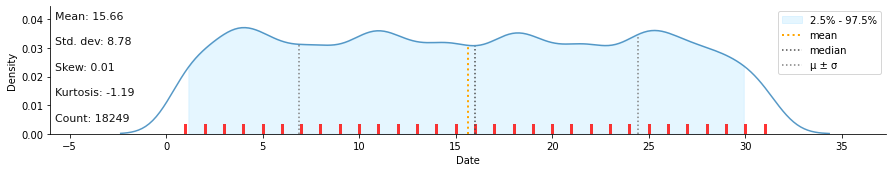

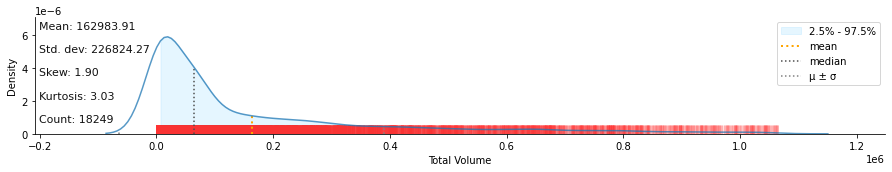

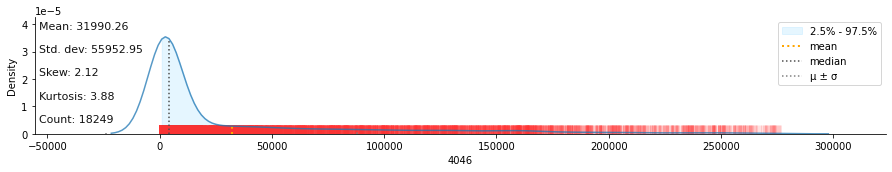

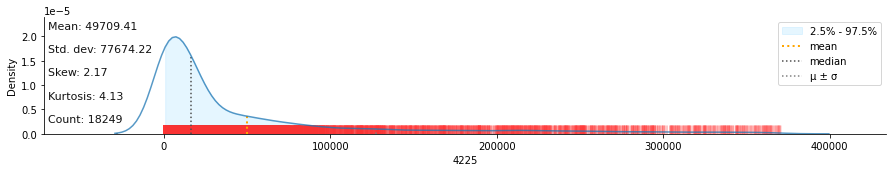

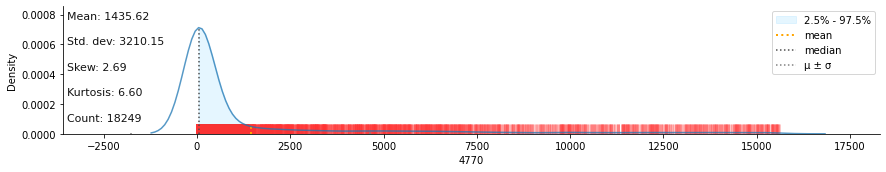

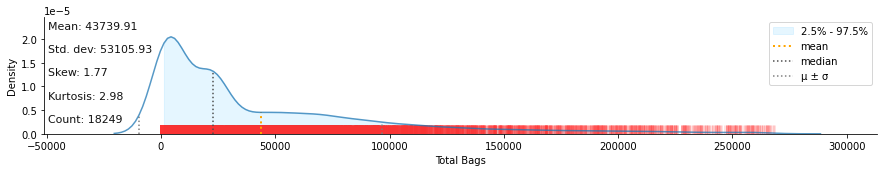

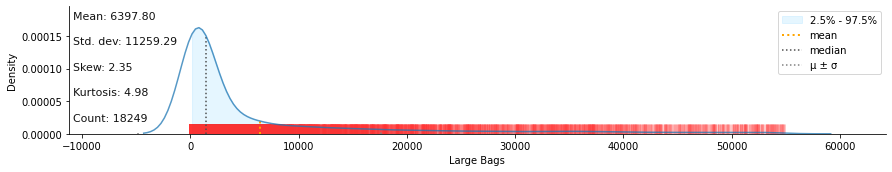

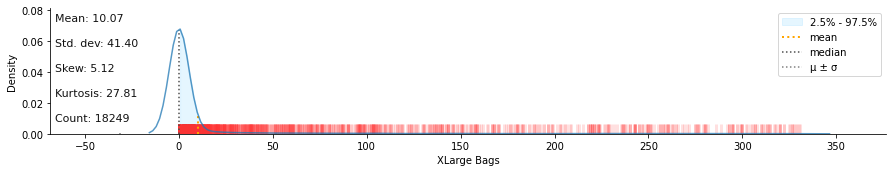

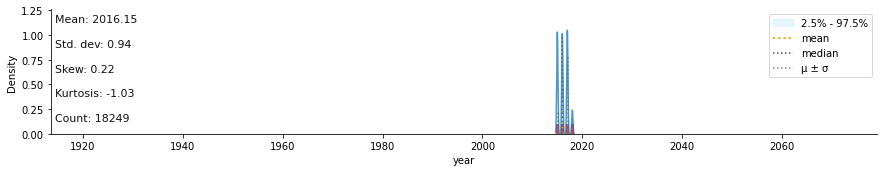

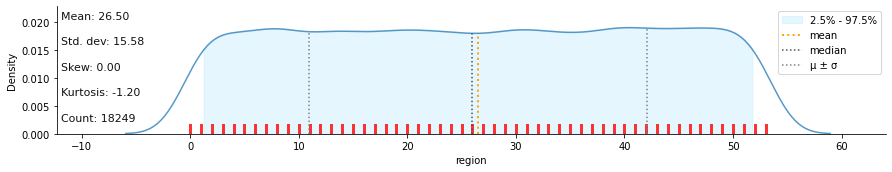

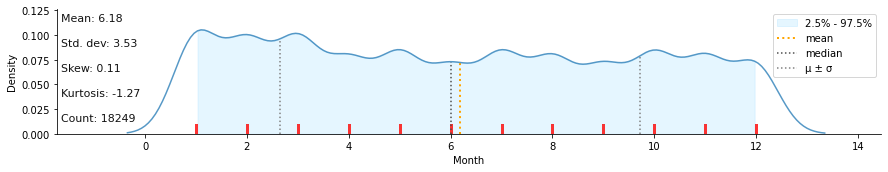

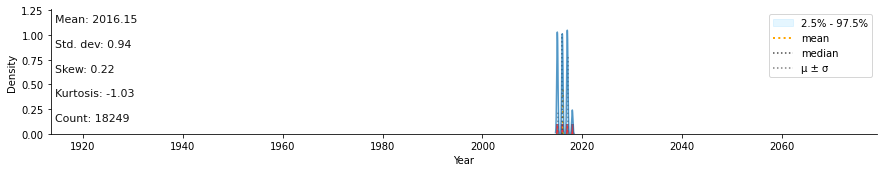

In [ ]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distribute  allmost normely in bell curve, except total bags. Also, Year has come twice.

In [ ]:
Data_Day.drop(['Year'], axis='columns', inplace = True)
Data_Day

,Date,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,region,Month,Day of Week
0,27,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,conventional,2015,0,12,6
1,20,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,conventional,2015,0,12,6
2,13,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,conventional,2015,0,12,6
3,6,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,conventional,2015,0,12,6
4,29,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,conventional,2015,0,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,organic,2018,53,2,6
18245,28,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,organic,2018,53,1,6
18246,21,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,organic,2018,53,1,6
18247,14,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,organic,2018,53,1,6


In [ ]:
!pip install pycaret[Full]==2.3. 4

In [ ]:
from pycaret.classification import * 
clf = setup(Data_Day, target='region', session_id=42)

,Description,Value
0,session_id,42
1,Target,region
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(18249, 13)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# compare all models


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7968,0.9837,0.7965,0.8028,0.7962,0.7929,0.7931,3.790
catboost,CatBoost Classifier,0.7846,0.9950,0.7842,0.7920,0.7846,0.7805,0.7806,194.180
lightgbm,Light Gradient Boosting Machine,0.7838,0.9915,0.7837,0.7916,0.7844,0.7797,0.7798,10.152
et,Extra Trees Classifier,0.7734,0.9677,0.7731,0.7863,0.7745,0.7691,0.7693,3.118
xgboost,Extreme Gradient Boosting,0.7698,0.9925,0.7696,0.7773,0.7700,0.7654,0.7656,192.019
gbc,Gradient Boosting Classifier,0.7106,0.9871,0.7103,0.7216,0.7106,0.7051,0.7053,185.462
dt,Decision Tree Classifier,0.6795,0.8367,0.6791,0.6937,0.6806,0.6735,0.6737,0.232
knn,K Neighbors Classifier,0.5627,0.9054,0.5624,0.5704,0.5590,0.5545,0.5547,0.214
nb,Naive Bayes,0.1835,0.7506,0.1843,0.3093,0.1875,0.1681,0.1801,0.117
lr,Logistic Regression,0.1646,0.7864,0.1644,0.1674,0.1461,0.1488,0.1502,33.793


In [ ]:
# check the best model
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
# predict on hold-out
pred_holdout = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7993,0.9826,0.7996,0.802,0.799,0.7955,0.7955


In [ ]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7950,0.9834,0.7947,0.7996,0.7915,0.7911,0.7914
1,0.7958,0.9838,0.7945,0.8023,0.7944,0.7919,0.7921
2,0.7825,0.9814,0.7822,0.7916,0.7832,0.7784,0.7785
3,0.8028,0.9813,0.8033,0.8085,0.8034,0.7991,0.7992
4,0.8027,0.9853,0.8031,0.8057,0.8013,0.7989,0.7990
5,0.7964,0.9828,0.7963,0.8048,0.7975,0.7925,0.7927
6,0.8027,0.9837,0.8024,0.8095,0.8034,0.7989,0.7990
7,0.7956,0.9856,0.7953,0.7996,0.7942,0.7918,0.7919
8,0.7917,0.9849,0.7914,0.8014,0.7927,0.7878,0.7879
9,0.8027,0.9849,0.8020,0.8047,0.8005,0.7989,0.7991


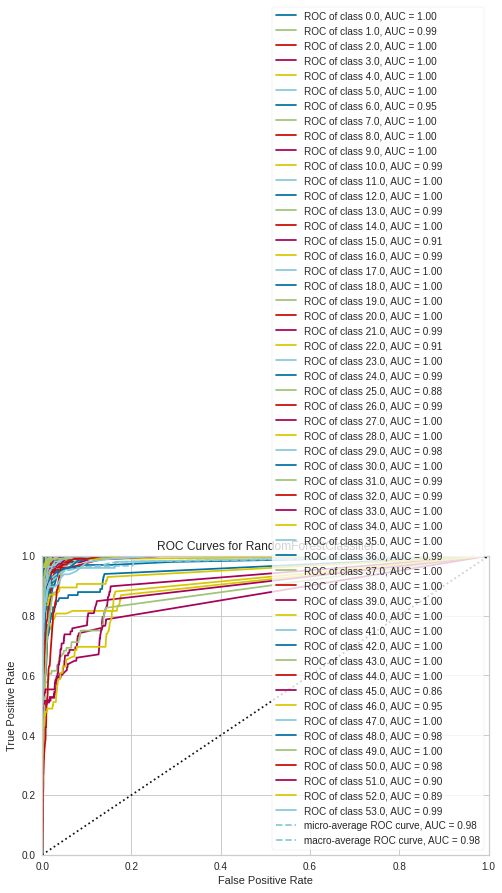

In [ ]:
plot_model(model)

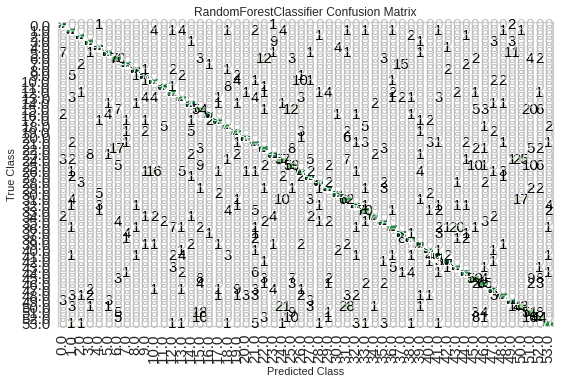

In [ ]:
plot_model(best_model, 'confusion_matrix')

In [ ]:
# create copy of data drop target column
Data = Data_Day.copy()
Data.drop('region', axis=1, inplace=True)
# generate predictions
predictions = predict_model(best_model, data = Data)
predictions

,Date,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,year,Month,Day of Week,Label,Score
0,27,64236.62,1036.74,54454.85,48.16,8696.87,93.25,0.0,conventional,2015,12,6,0,0.66
1,20,54876.98,674.28,44638.81,58.33,9505.56,97.49,0.0,conventional,2015,12,6,0,0.83
2,13,118220.22,794.70,109149.67,130.50,8145.35,103.14,0.0,conventional,2015,12,6,0,0.94
3,6,78992.15,1132.00,71976.41,72.58,5811.16,133.76,0.0,conventional,2015,12,6,0,0.86
4,29,51039.60,941.48,43838.39,75.78,6183.95,197.69,0.0,conventional,2015,11,6,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,17074.83,2046.96,1529.20,0.00,13498.67,431.85,0.0,organic,2018,2,6,53,0.86
18245,28,13888.04,1191.70,3431.50,0.00,9264.84,324.80,0.0,organic,2018,1,6,21,0.16
18246,21,13766.76,1191.92,2452.79,727.94,9394.11,42.31,0.0,organic,2018,1,6,53,0.67
18247,14,16205.22,1527.63,2981.04,727.01,10969.54,50.00,0.0,organic,2018,1,6,53,0.52
